# **Module 8: CLASSIFICATION: Trees**
In this notebook, we are going to study different ways of setting up the classic decision tree model in Python. At the end of this module, you will be able to:
* Explain what classification trees do
* Differentiate between types of classification trees
* Build simple classification trees

**Be sure to expand all the hidden cells, run all the code, and do all the exercises--you will need the techniques for the lesson lab!**


#**What is a Classification Tree (and why should you care)?**
A Classification tree assigns data records to discrete levels (or labels) in a class attribute. It is built through binary recursive partitioning, which means that data is being split into partitions, then sub-partitions, and sub-sub-partitions, and so on. The outcome is a tree with a root, several branches, and leaves like the one below (which comes from [this awesome post](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054) on classification trees that will tell you almost everything you need to know):

<div>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/classtree.jpeg" width="400">
</div>


Now take a look at the first video in which I explain this in more detail (and with examples):


In [101]:
from IPython.display import HTML # This is just for me so I can embed videos
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BxQAIyDxDKg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

The **BIG QUESTION** about Classification Trees is: How does the machine know when to split off a new branch? And then, on a more practical level: How do you tell it when you want it to split the data?

Well, there's some math involved. 

There are TWO major strategies to use for classification tree splits:
1. Information Gain
2. Gini Index

Find out how these work in my video below:


In [102]:
from IPython.display import HTML # This is just for me so I can embed videos
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/d1AKQgjc4Ag" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Still not quite sure about this? Go back to the [post on Towards Data Science](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054).

#**0. Preparation and Setup**
There really isn't anything new going on between the modules on k Nearest Neighbor and Naive Bayes and this one. We are still lassifying our data, which means that we follow this process:
In machine learning, classification has these steps:

1. Exploratory Data Analysis to see how the data is distributed and to determine what the class attribute in the dataset should be. This will be the attribute you'll predict later on
2. Preprocess the data (remove n/a, transform data types as needed, deal with missing data) and ensure that the dependent attribute is CATEGORICAL
3. Split the data into a training set and a test set
4. Build the model based on the training set
5. Test the model on the test set and compare the calculated class values to the actual class values shown in the test set with the help of a Confusion Matrix
6. Determine the quality of the model with the help of a Classification Report. 

As with our previous problems, we will use the insurance dataset again.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/insurance_with_categories.csv")

#Verifying that we can see the data
insurance.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now we are ready for our Exploratory Data Analysis (EDA).

#**1. Exploratory Data Analysis (EDA)**
This is always the first step. Even though we already know this dataset, let's walk through the motions again. In the previous module, we used the Pandas profiling package to generate a beautiful HTML interface with tabs that showed us everything we needed to know and then some more--but it required installing a new package. You may not always have the user permissions to do this. So, below is the basic process of data investigation.

##**1.1 Data Shape and Distribution**
Run each code line below to see what it does.

In [ ]:
insurance.describe(include = 'all'), print("***DATA OVERVIEW***")

In [ ]:
insurance.corr(), print("***DATA CORRELATIONS")

What do these commands show you? Why is this important? Explain in the text field below:

##**1.2 Some Basic Visualiations**

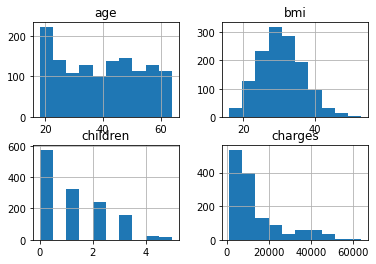

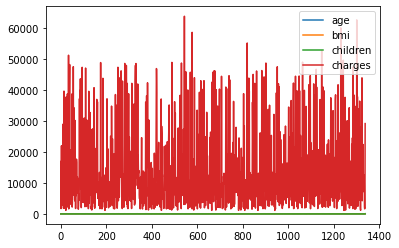

In [ ]:
# Data Distribution (numeric data only)
insurance.hist()
insurance.plot()

I know ... I promised you a pie plot in Module 1, and that was too hard back then. Here are two ways to do this. 

**NOTE** that all plots require numeric information, so you have to first count the size of each level in a categorical attribute and then build the pie size based on that. You already know groupby, so all you need to do is get the size of each group with the size() command--or you can make an array from the attribute and count the values. Both ways are shown below.

**Uncomment each of the code lines below separately to see how they work**:

In [ ]:
# You can also use the groupby command we have learned earlier in this course.
#insurance.groupby('sex').size().plot(kind='pie', autopct='%.2f')
#insurance['sex'].value_counts().plot(kind='pie', autopct='%.2f')

##Your Turn
Now analyze the second code line above and then display just the counts for the levels in the 'region' attribute:

#**2. Preprocessing: Building the Dataframe for Analysis**
We will, as before, use the "region" attribute as the class attribute and the numeric attributes (age, bmi, children, charges) in the insurance dataframe as the predictors. Since we already know that no data is missing, all we have to do is assemble the insurance2 dataframe we are going to use. 

In the code row below, build the insurance2 dataframe we need (if you don't remember how to do this, review last week's module in which we built this dataframe already):

#**3. Setting up the Training and the Test Sets**
Just like before, we need to build the training set and the test set again. We want a **80% training/ 20% test split**. Finish the code below to build this (if you can't remember how to do this, use the code from any of the two previous workbooks):

In [ ]:
from sklearn.model_selection import train_test_split
x=insurance2.iloc[:,:4] # all parameters
y=insurance2['region'] # class labels 'southwest', 'southeast', 'northwest', 'northeast'
X_train, X_test, y_train, y_test =                              # COMPLETE THIS LINE!
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

#**4. Build and Train the Tree classifier**
We are building a classifier with the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function from scikit learn.

##**4.1 Building the Classifier**
Some of the more interesting parameters are:
* criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

* splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. This may easily cause overfitting.

In [120]:
# Importing the tree library.
# We are setting the quality of the split measurement to entropy, so that the tree will work with Information Gain, and calling our classifier "clf".

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

##**4.2 Training the Classifier**
clf is our decision tree classifier. As before, we use .fit to train the classifier on the dataset. 
X_train[['age', 'bmi', 'children', 'charges']] are all the feature columns of the training set, and y_train is 'region'. Based on these we want to make a prediction.

In [121]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Check out the configuration of this classifier! We could already set a max_depth, so that the tree won't overfit. We call that "pruning". You can also see that the min_samples_split is set to 2 (default), which shows you that the basic assumption is a binary split. 2 samples is also really small ...

##**4.3 Visualizing the tree**

We are going to use [pydotplus](https://pydotplus.readthedocs.io/) for this purpose. This will create a neat tree as a graphic that we can export and embed in another document, even. Run the code below. **NOTE**: This may take a while to execute!

In [ ]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="insurance.dot", 
                         feature_names=['age', 'bmi', 'children', 'charges'],  
                         class_names=['southwest', 'southeast', 'northwest','northeast'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("insurance.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

WOW! That is a big tree (but then, this isn't the [tiny iris dataset](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054), either!). Click on the image to see more detail.

In the shapes above, we are seeing something like this:
<div>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/ctree_insurance_node.JPG" width="300" align=center>
</div>

So the number of samples is 1,070. 261 are southwest, 256 are southeast, 295 are northwest, and 258 northeast. Hence, class = northwest (because it has the highest count with 295).

From the samples and values lines we can calculate entropy, or information gain:

$$
info([261, 256, 295,258])=-\sum{261\over1070}log_2{({261\over1070})}+{256\over1070}log_2{({256\over1070})}+{295\over1070}log_2{({295\over1070})}+{258\over1070}log_2{({258\over1070})} = 1.997
$$
So the entropy of the node is 1.997.

Lastly, the first line contains the first split criterion:  The bmi must be smaller or equal to 32.983 to get to the next node in the hierarchy. 

##**5. Apply the model to the Test Set**
Once we fit our classifier to the data (i.e. we trained it) we can use the classifier to classify samples. 

In [ ]:
insurance_predictions = clf.predict(X_test)

#**6. Evaluate the Quality of the Model**
OK, now we can calculate the accuracy score and then look at the Confusion Matrix.

##**6.1 Accuracy Score**

First, the accuracy score:

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, insurance_predictions)

0.34328358208955223

Would you accept a result of 34% on an exam? (Take a look at the grading scale for this course to see where that would land you). Let's see what the Confusion Matrix tells us about this lousy score.

##**6.2 Confusion Matrix**
And now the Confusion Matrix:

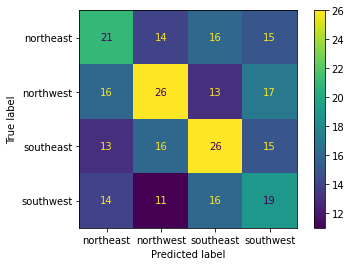

In [125]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

Let's look at the "northwest" row: Out of 16+26+13+17 = 72 true northwest values, only 26 were predicted correctly. 16 were predicted as northeast, 13 as southeast, and 17 as southwest. 
What about the "southwest" row? Are the results better or worse? Write your explanation into the text field below:

##**6.3 Classification Report**
Let's predict our y values so that we can build our classification report:

And here is the classification report:

In [126]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, insurance_predictions, labels=['southwest', 'southeast', 'northwest','northeast']))

              precision    recall  f1-score   support

   southwest       0.29      0.32      0.30        60
   southeast       0.37      0.37      0.37        70
   northwest       0.39      0.36      0.37        72
   northeast       0.33      0.32      0.32        66

    accuracy                           0.34       268
   macro avg       0.34      0.34      0.34       268
weighted avg       0.35      0.34      0.34       268



Can you explain what these numbers mean for the insurance2 dataset? If you're not sure, take a look at the previous workbook, in which they are all explained.

#**Your Turn**
Here is the buys_computer dataset from the instructor video. See if you can build and analyze a tree yourself!

In [ ]:
# Importing the buys_computer dataset

buys_computer = pd.read_csv('https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/buys_computer.csv')
buys_computer.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [ ]:
# Set up the training and test sets in this code cell

In [ ]:
# Build and train the classifier in this cell

In [ ]:
# Calculate the accuracy score in this cell

In [ ]:
# Build the Confusion matrix in this cell

In [ ]:
# Build the Classification report in this cell

Now interpret your findings in the text field below.

# Solutions

In [ ]:
# This is the solution for task 2 above. 
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
insurance2.head()

In [ ]:
# This is the solution for task 3 above:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 